In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(train_images[index])
    plt.title(f"Class: {class_names[train_labels[index]]}")
    plt.axis("off")
    plt.show()

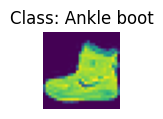

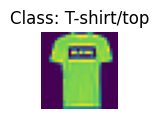

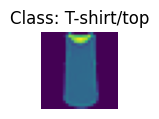

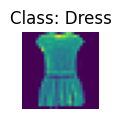

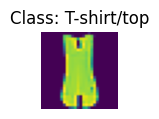

In [8]:
for i in range(5):
    plot_sample(i)

So we need to perform: 

1) Scalling of training and test images.

3) One Hot Encoding to the output parameters 

2) Converting the shape to 1D array (will be done during model building by creating a flattening layer)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_labels_categorical = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_categorical = keras.utils.to_categorical(test_labels, num_classes=10)

Model Building

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
model.fit(train_images, train_labels_categorical, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7911 - loss: 0.6453
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8428 - loss: 0.4560
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8568 - loss: 0.4133
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8660 - loss: 0.3858
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8720 - loss: 0.3661
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8763 - loss: 0.3497
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8814 - loss: 0.3363
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8848 - loss: 0.3249
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8876 - loss: 0.3138
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8922 - loss: 0.3034
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8952 - loss: 0.2941
Epoch 12/50
1875/

In [19]:
class_names[np.argmax(model.predict(test_images)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


'Pullover'

In [26]:
class_names[int(np.argmax(test_labels_categorical[1]))]

'Pullover'